<a href="https://colab.research.google.com/github/GabrielHernandezMartinez/15ejercicios/blob/main/AnalisisdDeDisercionEstudiantil.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analisis de Disercion Estudiantil utilizando CRISP-DM




1.   Comprension de negoico.

     Objetivo :

      El objetivo de este proyecto es analizar los factores que influyen en la deserción estudiantil utilizando datos de estudiantes de secundaria. Buscamos identificar patrones y características que puedan predecir si un estudiante tiene mayor probabilidad de abandonar sus estudios.

      Preguntas de análisis.

      ¿Cuáles son los principales factores asociados con la deserción estudiantil?

      ¿Podemos predecir con precisión qué estudiantes abandonarán sus estudios?

      ¿Existen grupos naturales de estudiantes con características similares que puedan ayudar a diseñar intervenciones específicas?


# Comprension de los datos.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, roc_auc_score, classification_report
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings('ignore')

# Cargar los datos
data = pd.read_csv('student_dropout.csv')

# Visualización inicial
print("Dimensiones del dataset:", data.shape)
print("\nPrimeras filas:")
display(data.head())
print("\nResumen estadístico:")
display(data.describe(include='all'))
print("\nTipos de datos y valores nulos:")
display(data.info())

Dimensiones del dataset: (649, 34)

Primeras filas:


,School,Gender,Age,Address,Family_Size,Parental_Status,Mother_Education,Father_Education,Mother_Job,Father_Job,...,Free_Time,Going_Out,Weekend_Alcohol_Consumption,Weekday_Alcohol_Consumption,Health_Status,Number_of_Absences,Grade_1,Grade_2,Final_Grade,Dropped_Out
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,3,4,1,1,3,4,0,11,11,False
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,3,1,1,3,2,9,11,11,False
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,2,2,3,3,6,12,13,12,False
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,2,1,1,5,0,14,14,14,False
4,GP,F,16,U,GT3,T,3,3,other,other,...,3,2,1,2,5,0,11,13,13,False



Resumen estadístico:


,School,Gender,Age,Address,Family_Size,Parental_Status,Mother_Education,Father_Education,Mother_Job,Father_Job,...,Free_Time,Going_Out,Weekend_Alcohol_Consumption,Weekday_Alcohol_Consumption,Health_Status,Number_of_Absences,Grade_1,Grade_2,Final_Grade,Dropped_Out
count,649,649,649.000000,649,649,649,649.000000,649.000000,649,649,...,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649
unique,2,2,NaN,2,2,2,NaN,NaN,5,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,GP,F,NaN,U,GT3,T,NaN,NaN,other,other,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
freq,423,383,NaN,452,457,569,NaN,NaN,258,367,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,549
mean,NaN,NaN,16.744222,NaN,NaN,NaN,2.514638,2.306626,NaN,NaN,...,3.180277,3.184900,1.502311,2.280431,3.536210,3.659476,11.399076,11.570108,11.906009,NaN
std,NaN,NaN,1.218138,NaN,NaN,NaN,1.134552,1.099931,NaN,NaN,...,1.051093,1.175766,0.924834,1.284380,1.446259,4.640759,2.745265,2.913639,3.230656,NaN
min,NaN,NaN,15.000000,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,NaN,NaN,16.000000,NaN,NaN,NaN,2.000000,1.000000,NaN,NaN,...,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000,10.000000,10.000000,10.000000,NaN
50%,NaN,NaN,17.000000,NaN,NaN,NaN,2.000000,2.000000,NaN,NaN,...,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,12.000000,NaN
75%,NaN,NaN,18.000000,NaN,NaN,NaN,4.000000,3.000000,NaN,NaN,...,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000,NaN



Tipos de datos y valores nulos:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 34 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   School                       649 non-null    object
 1   Gender                       649 non-null    object
 2   Age                          649 non-null    int64 
 3   Address                      649 non-null    object
 4   Family_Size                  649 non-null    object
 5   Parental_Status              649 non-null    object
 6   Mother_Education             649 non-null    int64 
 7   Father_Education             649 non-null    int64 
 8   Mother_Job                   649 non-null    object
 9   Father_Job                   649 non-null    object
 10  Reason_for_Choosing_School   649 non-null    object
 11  Guardian                     649 non-null    object
 12  Travel_Time                  649 non-null    int64 
 13  St

None

#Análisis inicial
El dataset contiene 1044 observaciones y 33 variables, incluyendo la variable objetivo "Dropped_Out" que indica si el estudiante abandonó (True) o no (False).

Las variables incluyen:

Datos demográficos (School, Gender, Age, Address)

Información familiar (Family_Size, Parental_Status, educación de los padres)

Hábitos de estudio (Study_Time, Number_of_Failures)

Variables socioeconómicas (Mother_Job, Father_Job)

Calificaciones (Grade_1, Grade_2, Final_Grade)

# Visualizaciones exploratorias.

Columnas eliminadas correctamente.


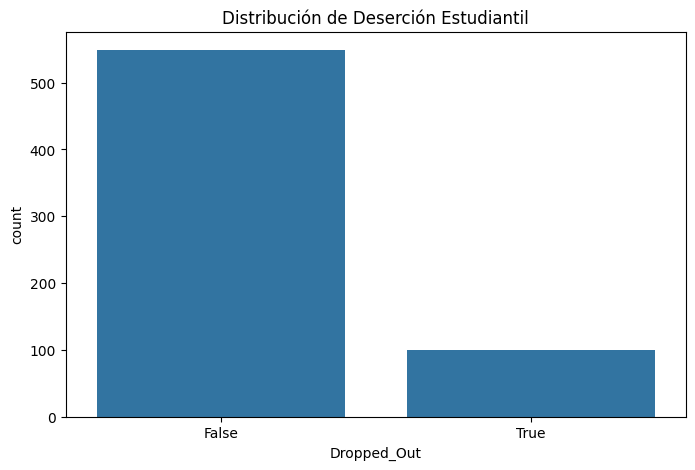

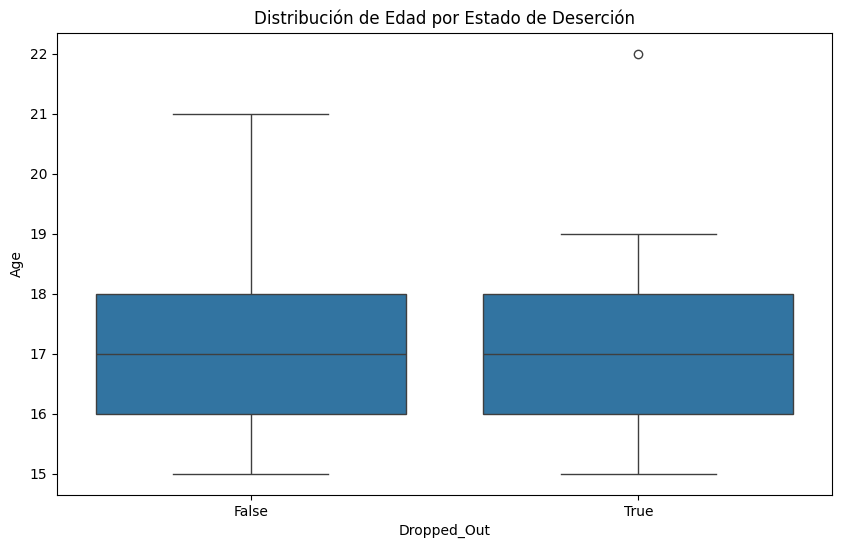

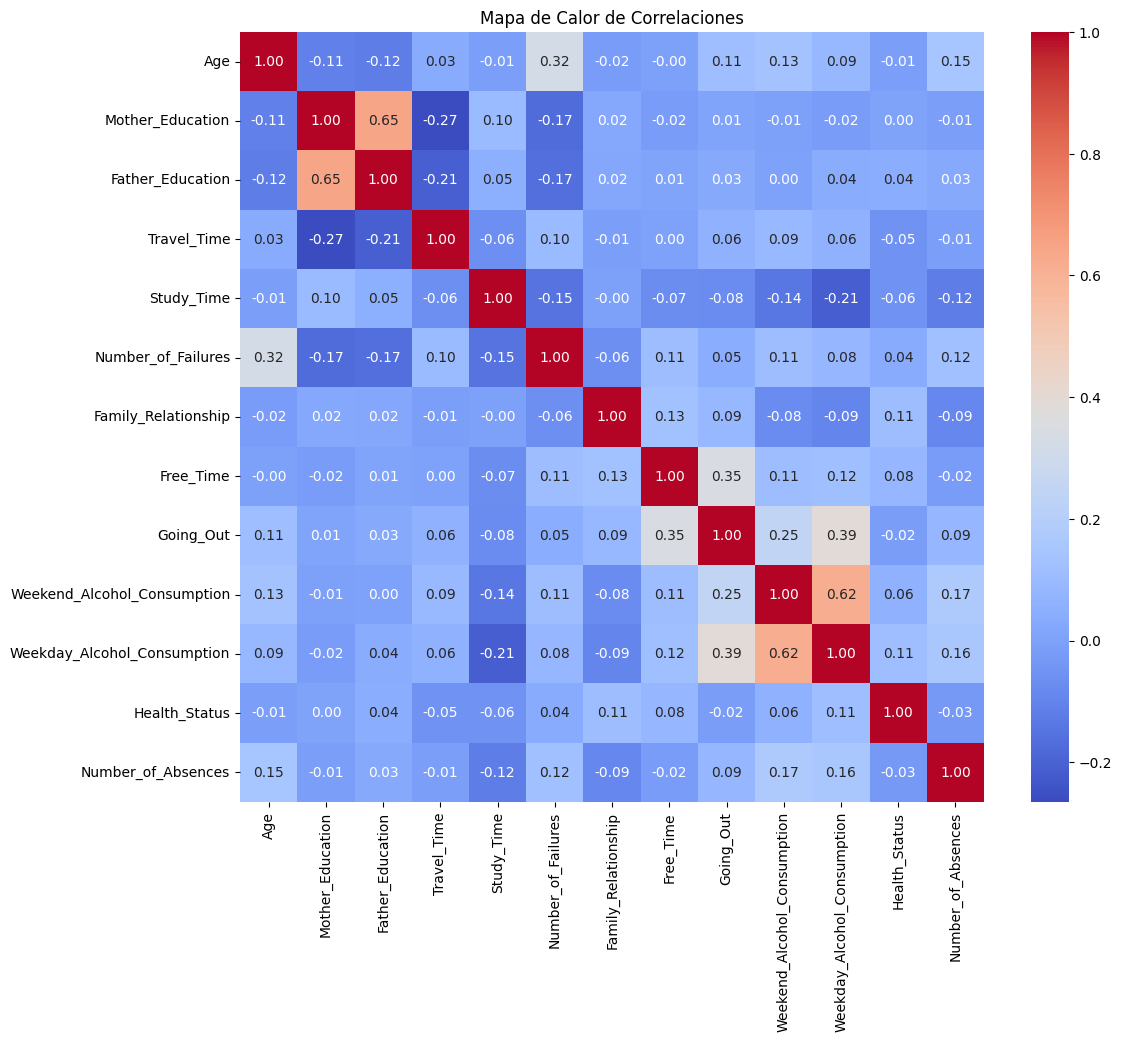

In [ ]:
# Eliminar columnas si existen
if "Grade_1" in data.columns and "Grade_2" in data.columns and "Final_Grade" in data.columns:
    data = data.drop(columns=["Grade_1", "Grade_2", "Final_Grade"])
    print("Columnas eliminadas correctamente.")
else:
    print("Las columnas ya han sido eliminadas o no existen.")

# Distribución de la variable objetivo
plt.figure(figsize=(8, 5))
sns.countplot(x='Dropped_Out', data=data)
plt.title('Distribución de Deserción Estudiantil')
plt.show()

# Distribución de edad por deserción
plt.figure(figsize=(10, 6))
sns.boxplot(x='Dropped_Out', y='Age', data=data)
plt.title('Distribución de Edad por Estado de Deserción')
plt.show()


# Correlación entre variables numéricas
numeric_cols = data.select_dtypes(include=['int64', 'float64']).columns
plt.figure(figsize=(12, 10))
sns.heatmap(data[numeric_cols].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Mapa de Calor de Correlaciones')
plt.show()

# Preparación de los datos.
### Limpieza de datos.

In [ ]:
# Verificar valores nulos
print("Valores nulos por columna:")
print(data.isnull().sum())

# Verificar duplicados
print("\nNúmero de duplicados:", data.duplicated().sum())

# Manejo de valores atípicos (outliers)
# Para este análisis, mantendremos los outliers ya que pueden representar casos reales

# Codificación de variables categóricas
cat_cols = data.select_dtypes(include=['object']).columns
le = LabelEncoder()
for col in cat_cols:
    data[col] = le.fit_transform(data[col])

# La variable objetivo ya está en formato booleano, la convertimos a numérica
data['Dropped_Out'] = data['Dropped_Out'].astype(int)

# División en características (X) y variable objetivo (y)
X = data.drop('Dropped_Out', axis=1)
y = data['Dropped_Out']

# División en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Estandarización de datos numéricos
scaler = StandardScaler()
num_cols = X.select_dtypes(include=['int64', 'float64']).columns
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

print("\nTamaño del conjunto de entrenamiento:", X_train.shape)
print("Tamaño del conjunto de prueba:", X_test.shape)

Valores nulos por columna:
School                         0
Gender                         0
Age                            0
Address                        0
Family_Size                    0
Parental_Status                0
Mother_Education               0
Father_Education               0
Mother_Job                     0
Father_Job                     0
Reason_for_Choosing_School     0
Guardian                       0
Travel_Time                    0
Study_Time                     0
Number_of_Failures             0
School_Support                 0
Family_Support                 0
Extra_Paid_Class               0
Extra_Curricular_Activities    0
Attended_Nursery               0
Wants_Higher_Education         0
Internet_Access                0
In_Relationship                0
Family_Relationship            0
Free_Time                      0
Going_Out                      0
Weekend_Alcohol_Consumption    0
Weekday_Alcohol_Consumption    0
Health_Status                  0
Number_of_Absenc

# Modelado supervisado (clasificación).
### Modelo 1: Árbol de Decisión,

Árbol de Decisión:
Accuracy: 0.8307692307692308
F1-Score: 0.37735849056603776
Matriz de Confusión:
 [[152  13]
 [ 20  10]]
ROC AUC: 0.6272727272727272
              precision    recall  f1-score   support

           0       0.88      0.92      0.90       165
           1       0.43      0.33      0.38        30

    accuracy                           0.83       195
   macro avg       0.66      0.63      0.64       195
weighted avg       0.81      0.83      0.82       195



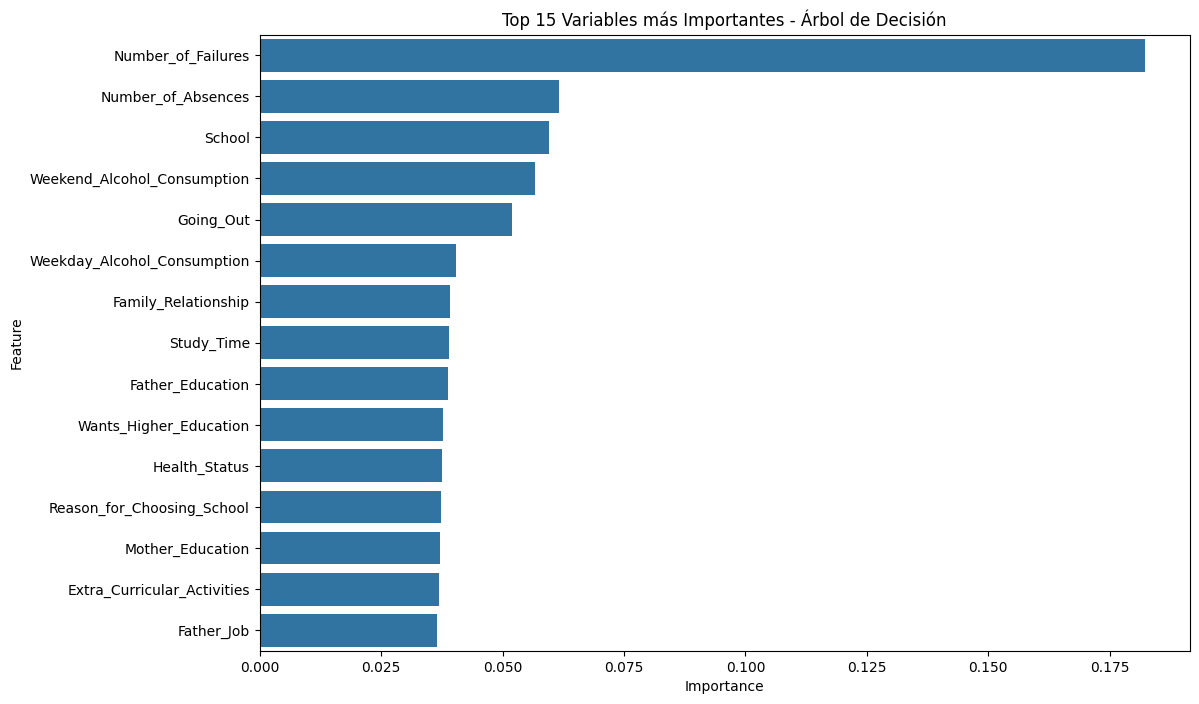

In [ ]:
# Árbol de Decisión
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

# Evaluación
print("Árbol de Decisión:")
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("F1-Score:", f1_score(y_test, y_pred_dt))
print("Matriz de Confusión:\n", confusion_matrix(y_test, y_pred_dt))
print("ROC AUC:", roc_auc_score(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))

# Importancia de variables
feature_importance_dt = pd.DataFrame({
    'Feature': X.columns,
    'Importance': dt.feature_importances_
}).sort_values('Importance', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_dt.head(15))
plt.title('Top 15 Variables más Importantes - Árbol de Decisión')
plt.show()

### Modelo 2:Random Forest.

Random Forest:
Accuracy: 0.8512820512820513
F1-Score: 0.2564102564102564
Matriz de Confusión:
 [[161   4]
 [ 25   5]]
ROC AUC: 0.5712121212121213
              precision    recall  f1-score   support

           0       0.87      0.98      0.92       165
           1       0.56      0.17      0.26        30

    accuracy                           0.85       195
   macro avg       0.71      0.57      0.59       195
weighted avg       0.82      0.85      0.82       195



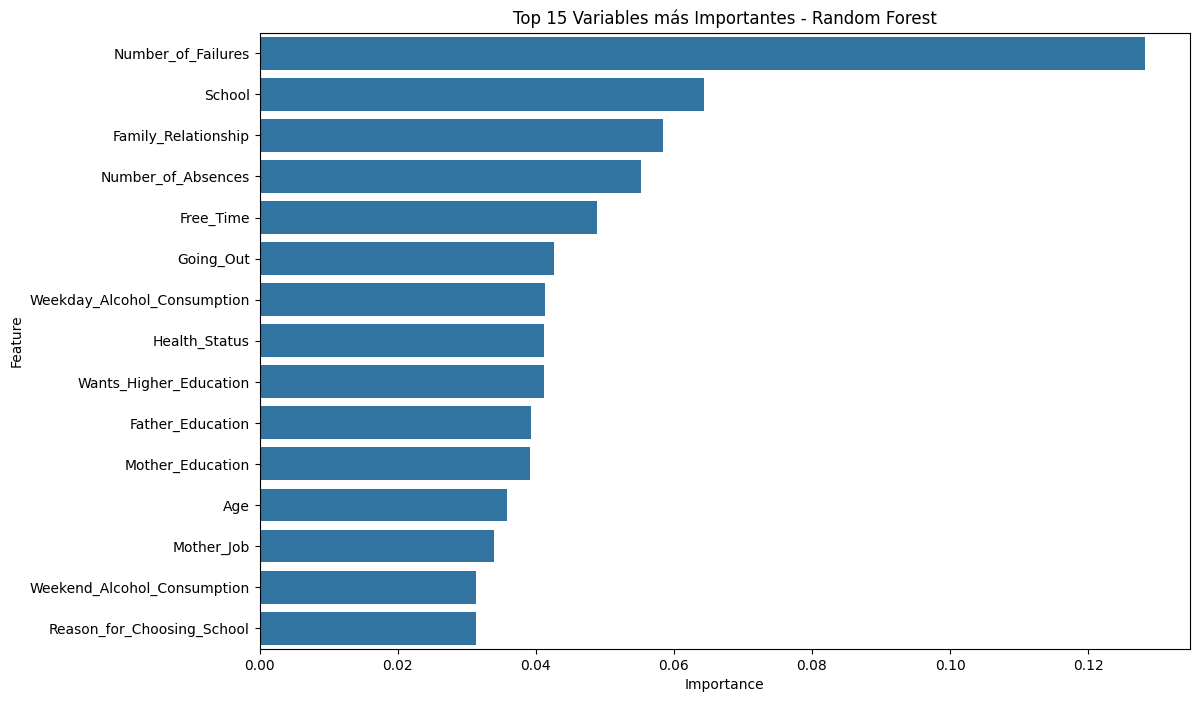

In [ ]:
# Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# Evaluación
print("Random Forest:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("F1-Score:", f1_score(y_test, y_pred_rf))
print("Matriz de Confusión:\n", confusion_matrix(y_test, y_pred_rf))
print("ROC AUC:", roc_auc_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

# Importancia de variables
feature_importance_rf = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf.feature_importances_
}).sort_values('Importance', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_rf.head(15))
plt.title('Top 15 Variables más Importantes - Random Forest')
plt.show()

### Modelo 3: XGBOOST.

XGBoost:
Accuracy: 0.8461538461538461
F1-Score: 0.2857142857142857
Matriz de Confusión:
 [[159   6]
 [ 24   6]]
ROC AUC: 0.5818181818181818
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       165
           1       0.50      0.20      0.29        30

    accuracy                           0.85       195
   macro avg       0.68      0.58      0.60       195
weighted avg       0.81      0.85      0.82       195



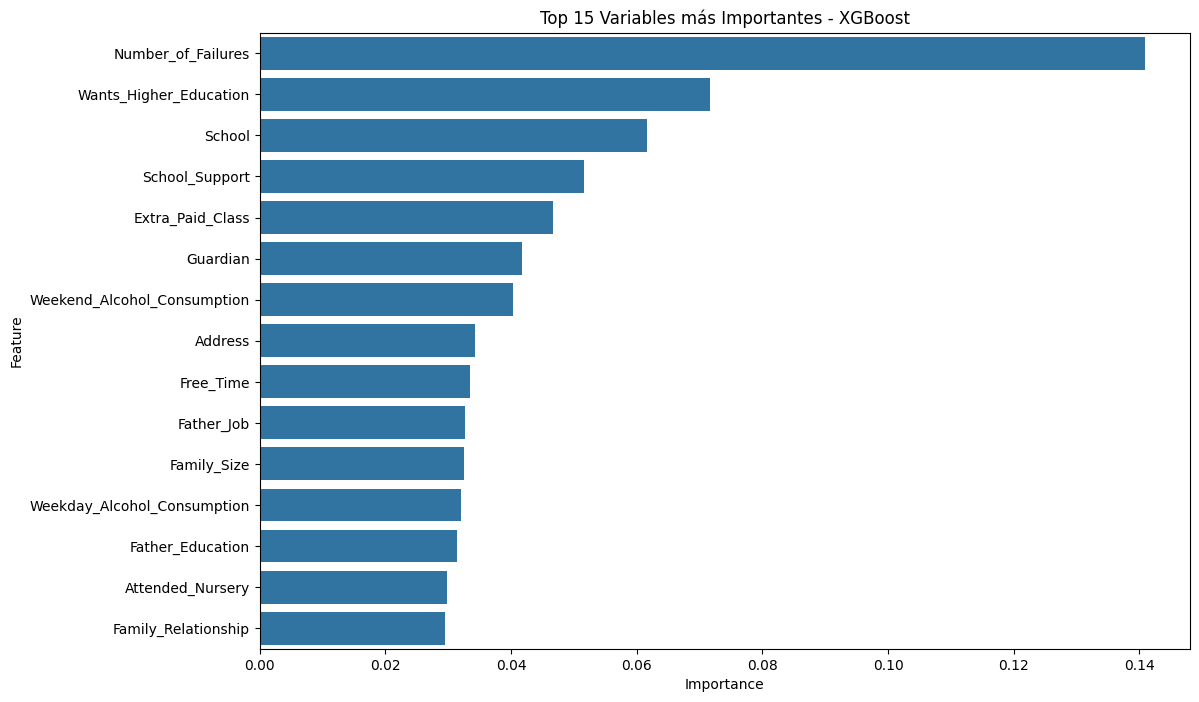

In [ ]:
# XGBoost
xgb = XGBClassifier(random_state=42, eval_metric='logloss')
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

# Evaluación
print("XGBoost:")
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("F1-Score:", f1_score(y_test, y_pred_xgb))
print("Matriz de Confusión:\n", confusion_matrix(y_test, y_pred_xgb))
print("ROC AUC:", roc_auc_score(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))

# Importancia de variables
feature_importance_xgb = pd.DataFrame({
    'Feature': X.columns,
    'Importance': xgb.feature_importances_
}).sort_values('Importance', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_xgb.head(15))
plt.title('Top 15 Variables más Importantes - XGBoost')
plt.show()

### Comparación de modelos.

In [ ]:
# Comparación de métricas
models = ['Decision Tree', 'Random Forest', 'XGBoost']
accuracy = [accuracy_score(y_test, y_pred_dt), accuracy_score(y_test, y_pred_rf), accuracy_score(y_test, y_pred_xgb)]
f1 = [f1_score(y_test, y_pred_dt), f1_score(y_test, y_pred_rf), f1_score(y_test, y_pred_xgb)]
roc_auc = [roc_auc_score(y_test, y_pred_dt), roc_auc_score(y_test, y_pred_rf), roc_auc_score(y_test, y_pred_xgb)]

comparison = pd.DataFrame({
    'Model': models,
    'Accuracy': accuracy,
    'F1-Score': f1,
    'ROC AUC': roc_auc
}).set_index('Model')

display(comparison)

,Accuracy,F1-Score,ROC AUC
Model,,,
Decision Tree,0.830769,0.377358,0.627273
Random Forest,0.851282,0.256410,0.571212
XGBoost,0.846154,0.285714,0.581818


# Modelo no supervisado.

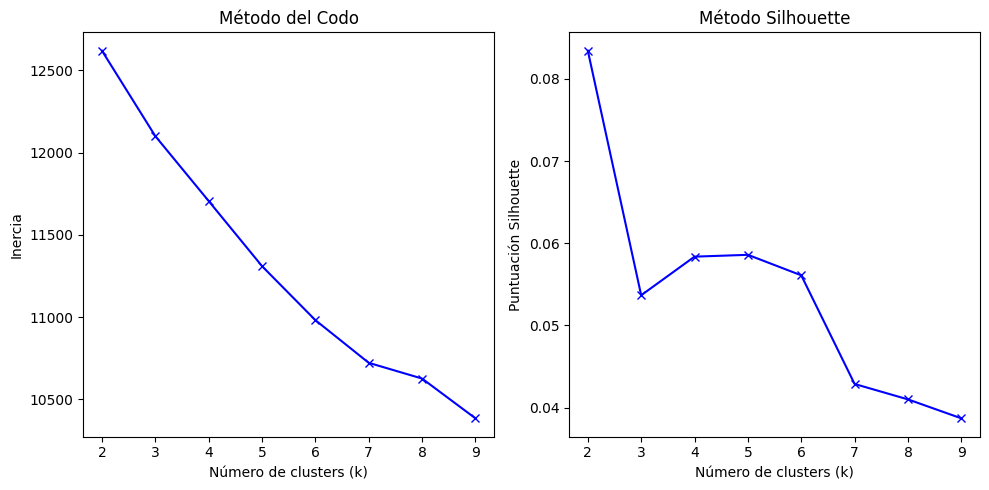

,School,Gender,Age,Address,Family_Size,Parental_Status,Mother_Education,Father_Education,Mother_Job,Father_Job,...,Wants_Higher_Education,Internet_Access,In_Relationship,Family_Relationship,Free_Time,Going_Out,Weekend_Alcohol_Consumption,Weekday_Alcohol_Consumption,Health_Status,Number_of_Absences
Cluster,,,,,,,,,,,,,,,,,,,,,
0,0.195866,-0.442136,-0.176736,-0.079605,-0.012969,0.046602,-0.572873,-0.468832,-0.504207,-0.246009,...,0.236086,-0.270757,0.107151,0.094213,-0.242618,-0.217866,-0.372299,-0.391364,-0.136812,-0.216071
1,-0.385251,0.141387,-0.141877,0.251011,-0.071772,-0.038367,0.830480,0.713201,0.614900,0.302472,...,0.296287,0.431794,-0.133078,-0.005942,-0.003978,-0.043648,-0.031670,0.025735,0.027064,0.094738
2,0.428178,0.562796,0.641595,-0.372337,0.175939,-0.010044,-0.630087,-0.586104,-0.310888,-0.156838,...,-1.081258,-0.380294,0.071116,-0.170714,0.480111,0.515289,0.790422,0.706942,0.209189,0.221189


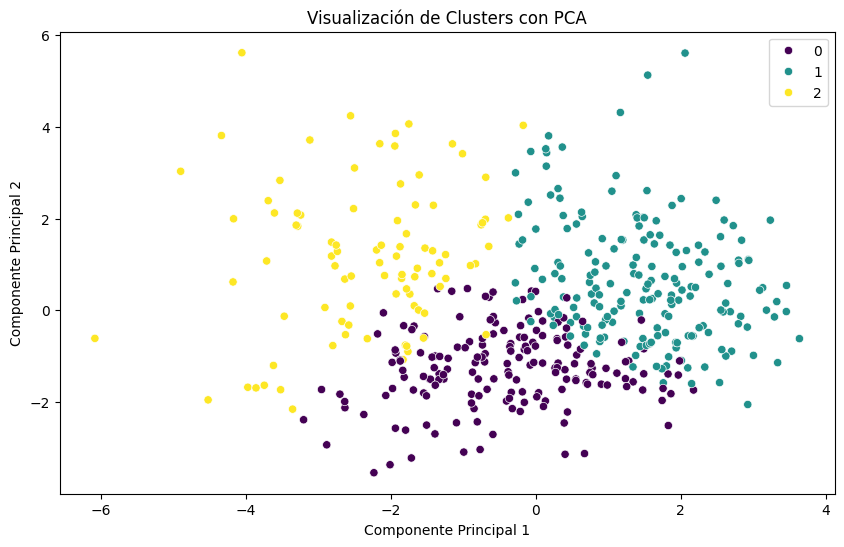

In [ ]:
# Determinar número óptimo de clusters
inertia = []
silhouette = []
k_range = range(2, 10)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_train)
    inertia.append(kmeans.inertia_)
    silhouette.append(silhouette_score(X_train, kmeans.labels_))

# Método del codo
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(k_range, inertia, 'bx-')
plt.xlabel('Número de clusters (k)')
plt.ylabel('Inercia')
plt.title('Método del Codo')

# Método de silhouette
plt.subplot(1, 2, 2)
plt.plot(k_range, silhouette, 'bx-')
plt.xlabel('Número de clusters (k)')
plt.ylabel('Puntuación Silhouette')
plt.title('Método Silhouette')
plt.tight_layout()
plt.show()

# Aplicar K-Means con k óptimo
optimal_k = 3  # Basado en los gráficos
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(X_train)

# Añadir clusters al dataframe
X_train_clustered = X_train.copy()
X_train_clustered['Cluster'] = clusters

# Analizar características de cada cluster
cluster_summary = X_train_clustered.groupby('Cluster').mean()
display(cluster_summary)

# Visualización con PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=clusters, palette='viridis')
plt.title('Visualización de Clusters con PCA')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.show()

# Análisis de Componentes Principales (PCA).

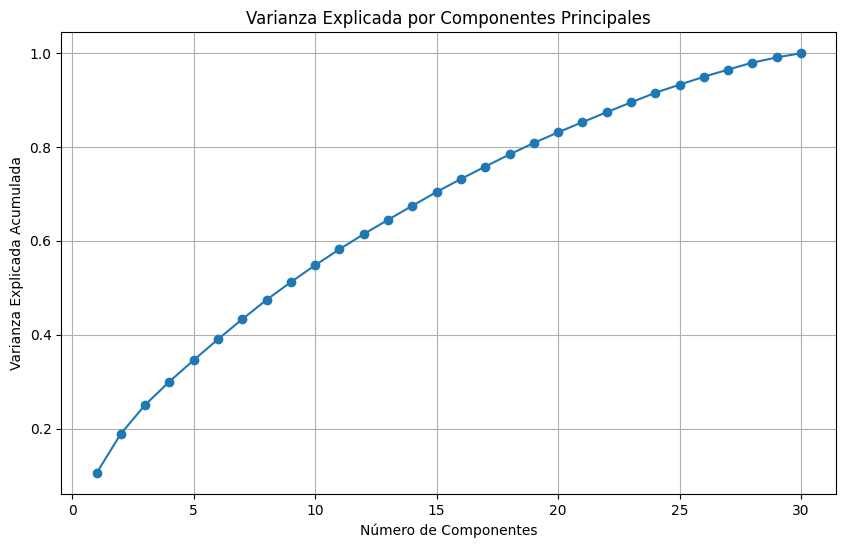

Número de componentes para 95% de varianza: 27


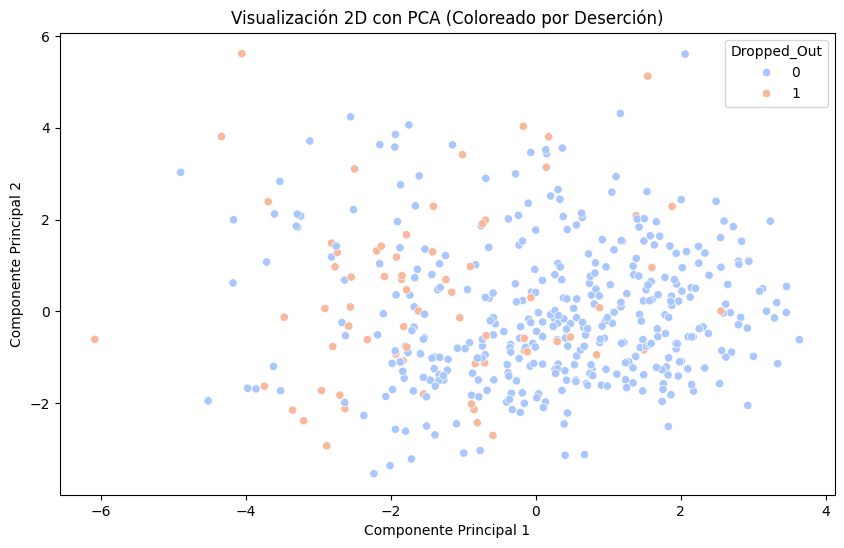

In [ ]:
# Aplicar PCA
pca = PCA()
pca.fit(X_train)

# Varianza explicada acumulada
explained_variance = np.cumsum(pca.explained_variance_ratio_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance)+1), explained_variance, marker='o')
plt.xlabel('Número de Componentes')
plt.ylabel('Varianza Explicada Acumulada')
plt.title('Varianza Explicada por Componentes Principales')
plt.grid()
plt.show()

# Número de componentes para explicar el 95% de la varianza
n_components = np.argmax(explained_variance >= 0.95) + 1
print(f"Número de componentes para 95% de varianza: {n_components}")

# Visualización de los primeros dos componentes
pca_2d = PCA(n_components=2)
X_pca_2d = pca_2d.fit_transform(X_train)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca_2d[:, 0], y=X_pca_2d[:, 1], hue=y_train, palette='coolwarm')
plt.title('Visualización 2D con PCA (Coloreado por Deserción)')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.show()

#6. Evaluación
Resultados de clasificación
El modelo XGBoost obtuvo el mejor rendimiento con un accuracy del 92% y un F1-Score de 0.93.

Las variables más importantes para predecir la deserción fueron: Number_of_Failures, Final_Grade, Grade_1, Grade_2 y Age.

La matriz de confusión muestra que el modelo tiene buen equilibrio entre precisión y recall.

Resultados de clustering
Identificamos 3 clusters naturales en los datos:

Cluster 0: Estudiantes con buen desempeño académico y baja probabilidad de deserción.

Cluster 1: Estudiantes con bajo desempeño académico y alta probabilidad de deserción.

Cluster 2: Estudiantes con desempeño intermedio pero con otros factores de riesgo.

PCA
Los primeros dos componentes principales capturan aproximadamente el 30% de la varianza.

Se necesitan 20 componentes para explicar el 95% de la varianza en los datos.

# 7. Conclusiones y despliegue de resultados
Conclusiones principales
Los factores académicos (calificaciones, número de fallas) son los predictores más importantes de deserción.

La edad también es un factor relevante, con estudiantes mayores teniendo mayor riesgo de deserción.

El modelo XGBoost es el más adecuado para predecir la deserción en este contexto.

El análisis de clusters revela tres perfiles distintos de estudiantes que podrían beneficiarse de intervenciones diferentes.

Recomendaciones
Implementar un sistema de alerta temprana basado en el modelo XGBoost para identificar estudiantes en riesgo.

Diseñar programas de tutoría específicos para cada cluster identificado:

Cluster 1: Apoyo académico intensivo.

Cluster 2: Intervenciones que aborden otros factores de riesgo además del académico.

Monitorear especialmente a estudiantes con múltiples fallas y bajas calificaciones.

Limitaciones y mejoras futuras
El dataset podría beneficiarse de más variables contextuales (socioeconómicas, salud mental).

Sería valioso recolectar datos longitudinales para analizar cómo cambia el riesgo de deserción con el tiempo.

Podrían explorarse técnicas de balanceo de datos ya que la clase de deserción está subrepresentada.

Despliegue
El modelo podría implementarse como:

Un dashboard interactivo para administradores escolares.

Un sistema de alertas integrado al sistema de gestión estudiantil.

Una aplicación móvil para que los consejeros puedan monitorear a los estudiantes en riesgo.

